#Install dependecies

In [2]:
!pip install tomsup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tomsup to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3


#Import dependecies

In [3]:
import tomsup as ts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import time

#Define agents and environment

In [4]:
# create a list of agents
agents = ["0-TOM", "1-TOM", "2-TOM", "3-TOM", "4-TOM", "5-TOM", "QL"]

# create a list of their starting parameters (an empty dictionary {} simply assumes defaults)
start_params = [
    {"level": 1, "save_history":True},
    {"level": 2, "save_history":True},
    {"level": 3, "save_history":True},
    {"level": 4, "save_history":True},
    {"level": 5, "save_history":True},
    {"level": 6, "save_history":True},
    {"learning_rate": 0.5},
]

# create a group of agents
group = ts.create_agents(agents, start_params)

print(group)
#set environment
group.set_env(
    env="round_robin"
)

<Class AgentGroup, envinment = None> 

0-TOM	 | 	{'level': 1, 'save_history': True}
1-TOM	 | 	{'level': 2, 'save_history': True}
2-TOM	 | 	{'level': 3, 'save_history': True}
3-TOM	 | 	{'level': 4, 'save_history': True}
4-TOM	 | 	{'level': 5, 'save_history': True}
5-TOM	 | 	{'level': 6, 'save_history': True}
QL	 | 	{'learning_rate': 0.5}


#Define payoff matrices

In [5]:
penny = ts.PayoffMatrix(name='penny_competitive')
print(penny)

prisoners_dilemma = ts.PayoffMatrix(name='prisoners_dilemma')
print(prisoners_dilemma)

staghunt = ts.PayoffMatrix(name='staghunt')
print(staghunt)

<Class PayoffMatrix, Name = penny_competitive> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 | -1 |  1 |
agent 0|  1 |  1 | -1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 
<Class PayoffMatrix, Name = prisoners_dilemma> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 5 |
agent 0| 1 | 0 | 3 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 0 |
agent 0| 1 | 5 | 3 |
 
<Class PayoffMatrix, Name = staghunt> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 3 |
agent 0| 1 | 0 | 5 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 0 |
agent 0| 1 | 3 | 5 |
 


#Matching Pennies game

##Save results from the competition

In [6]:
#results_penny = group.compete(p_matrix=penny, n_rounds=100, n_sim=30, verbose=True)

agent_names = group.get_names()

# Prepare to store timing results
timing_data = []
results_all = []

# Manually simulate each pair of agent objects
for i, name_a in enumerate(agent_names):
    for j, name_b in enumerate(agent_names):
        if i <= j:
            continue

        agent_a = group.get_agent(name_a)
        agent_b = group.get_agent(name_b)

        print(f"\n Simulating pair: ({name_a}, {name_b})")

        start_time = time.time()

        # Run 30 simulations of 100 rounds
        df = ts.compete(agent_a, agent_b, p_matrix=penny, n_rounds=100, n_sim=30)

        elapsed = time.time() - start_time

        # Save timing
        timing_data.append({
            "agent_a": name_a,
            "agent_b": name_b,
            "elapsed_sec": elapsed
        })

        df['agent_a'] = name_a
        df['agent_b'] = name_b

        results_all.append(df)

# Convert to DataFrame for analysis
timing_df = pd.DataFrame(timing_data)

df_all = pd.concat(results_all, ignore_index=True)

# Save to CSV if needed
timing_df.to_csv("timing_results_penny.csv", index=False)



 Simulating pair: (1-TOM, 0-TOM)

 Simulating pair: (2-TOM, 0-TOM)

 Simulating pair: (2-TOM, 1-TOM)

 Simulating pair: (3-TOM, 0-TOM)

 Simulating pair: (3-TOM, 1-TOM)

 Simulating pair: (3-TOM, 2-TOM)

 Simulating pair: (4-TOM, 0-TOM)

 Simulating pair: (4-TOM, 1-TOM)

 Simulating pair: (4-TOM, 2-TOM)

 Simulating pair: (4-TOM, 3-TOM)

 Simulating pair: (5-TOM, 0-TOM)

 Simulating pair: (5-TOM, 1-TOM)

 Simulating pair: (5-TOM, 2-TOM)

 Simulating pair: (5-TOM, 3-TOM)

 Simulating pair: (5-TOM, 4-TOM)

 Simulating pair: (QL, 0-TOM)

 Simulating pair: (QL, 1-TOM)

 Simulating pair: (QL, 2-TOM)

 Simulating pair: (QL, 3-TOM)

 Simulating pair: (QL, 4-TOM)

 Simulating pair: (QL, 5-TOM)


##Plot the results

Main performance metrics:

1. Average Score per Agent => heatmaps and bar graphs
2. Learning Speed / Convergence Time => mean score across simulations plot
3. Performance Variability / Robustness => confidence intervals

Computation Cost metric: Computation Cost => runtime plot

###Heatmap

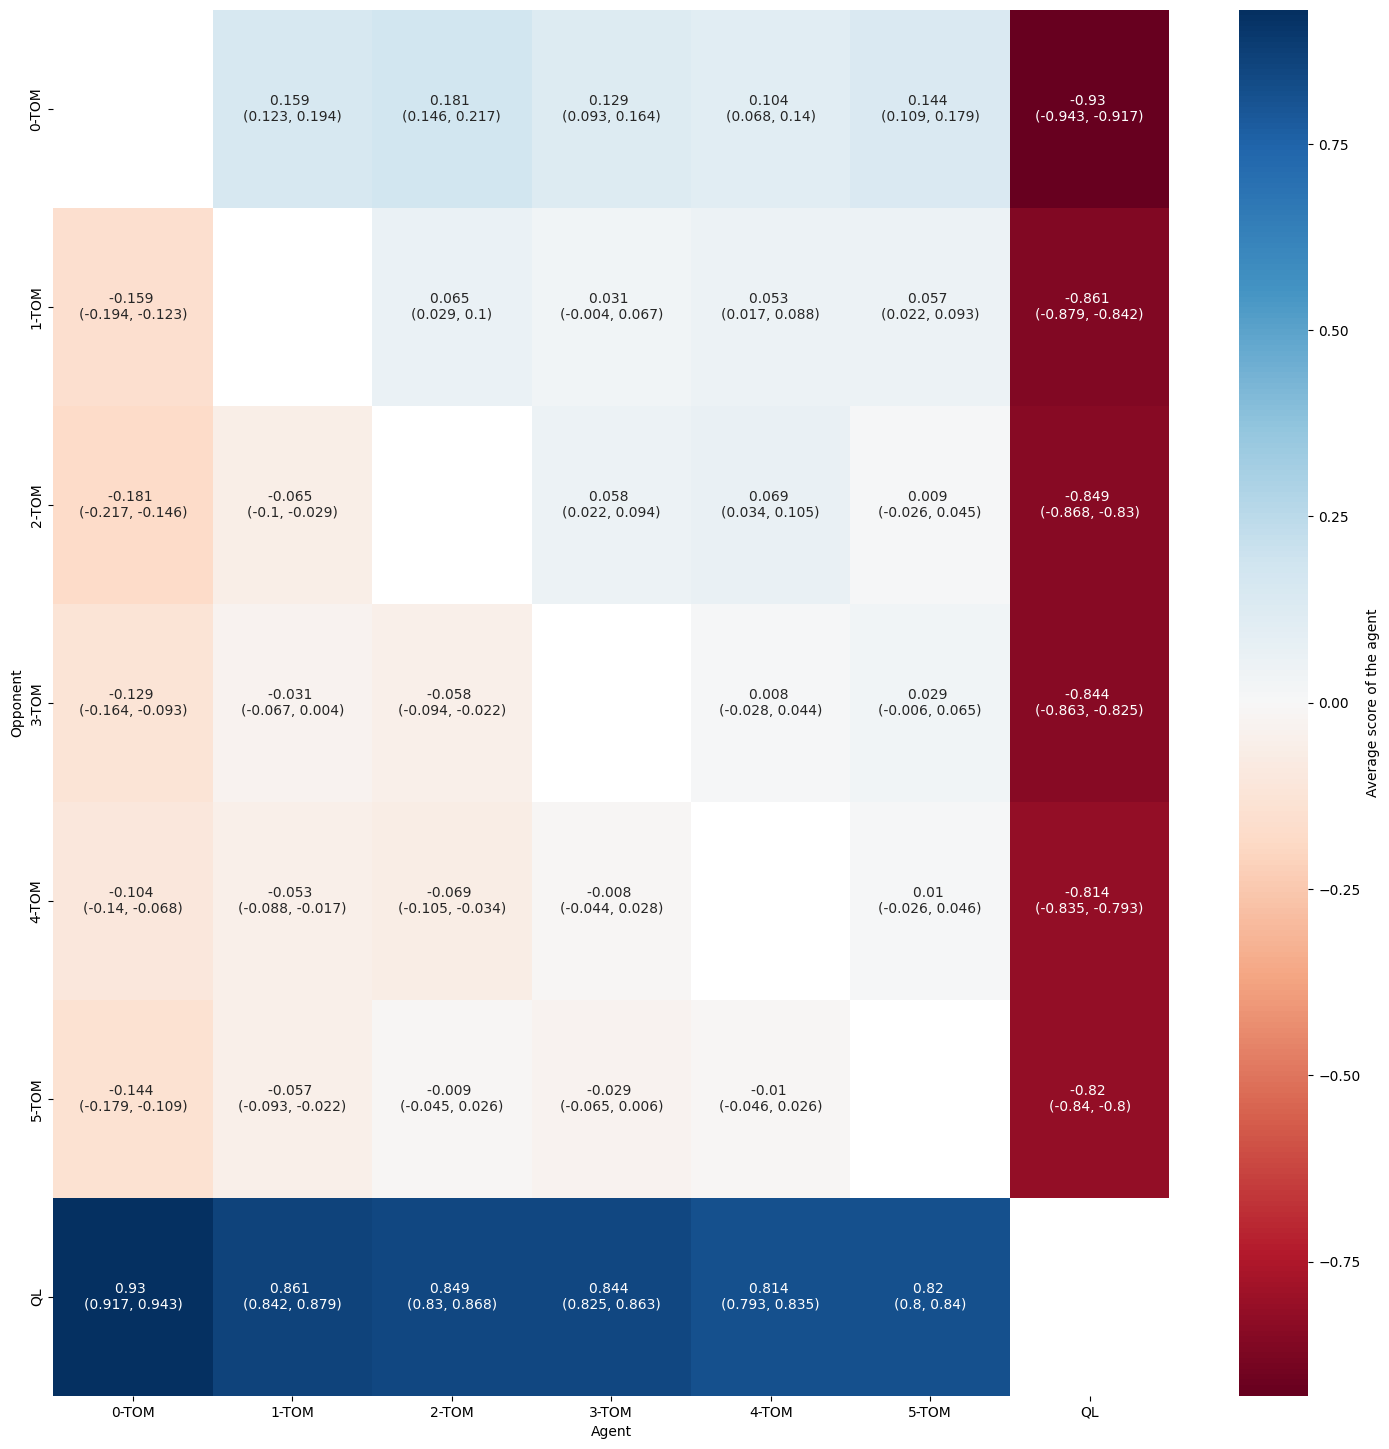

In [16]:
# Set figure size
plt.rcParams["figure.figsize"] = [18, 18]

group.plot_heatmap(cmap="RdBu")

###Bar Graphs for Average Score per Agent

<ipython-input-13-3894982639>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores, x='agent', y='payoff', palette='viridis')


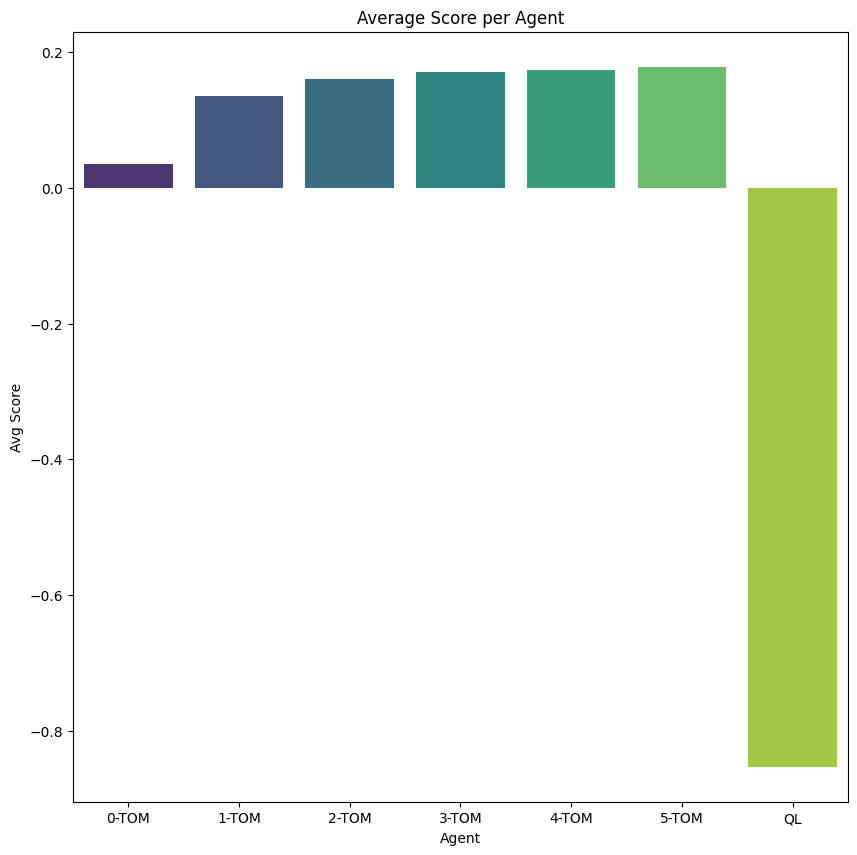

In [13]:
# First reshape to get all agent performances into one column
agent0_df = results_penny[['agent0', 'payoff_agent0']].rename(columns={'agent0': 'agent', 'payoff_agent0': 'payoff'})
agent1_df = results_penny[['agent1', 'payoff_agent1']].rename(columns={'agent1': 'agent', 'payoff_agent1': 'payoff'})
all_agents = pd.concat([agent0_df, agent1_df])

# Group and average
avg_scores = all_agents.groupby('agent')['payoff'].mean().reset_index()

# Plot
sns.barplot(data=avg_scores, x='agent', y='payoff', palette='viridis')
plt.title('Average Score per Agent')
plt.ylabel('Avg Score')
plt.xlabel('Agent')
plt.show()

###Learning Speed: Performance Over Time

<Figure size 1000x1000 with 0 Axes>

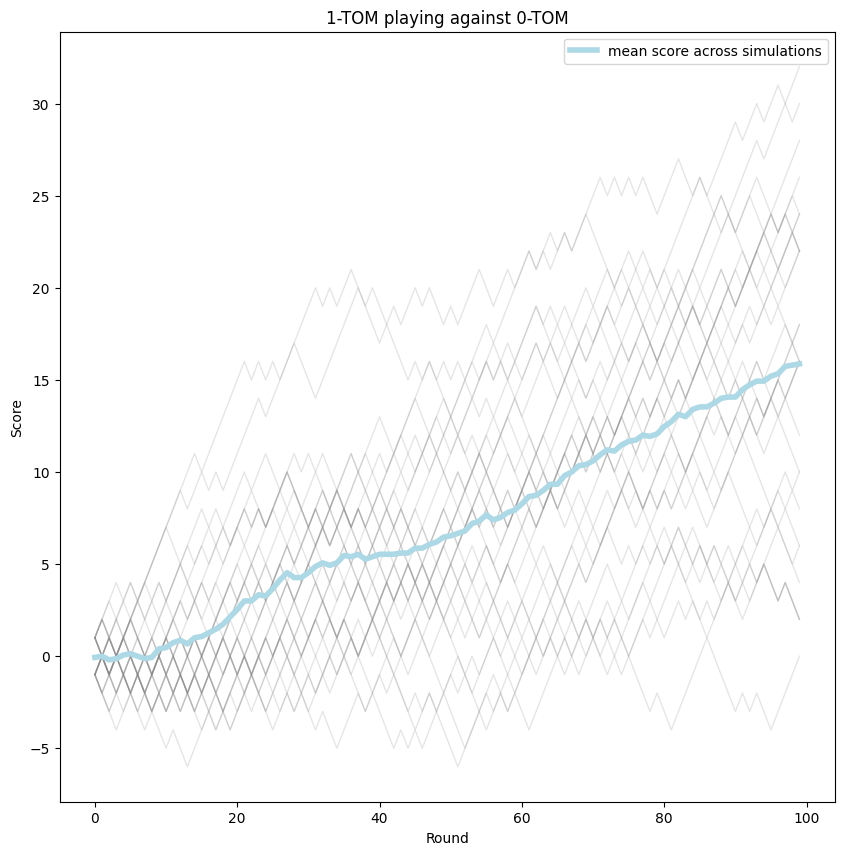

In [22]:
plt.rcParams["figure.figsize"] = [10, 10]
group.plot_score(agent0="0-TOM", agent1="1-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

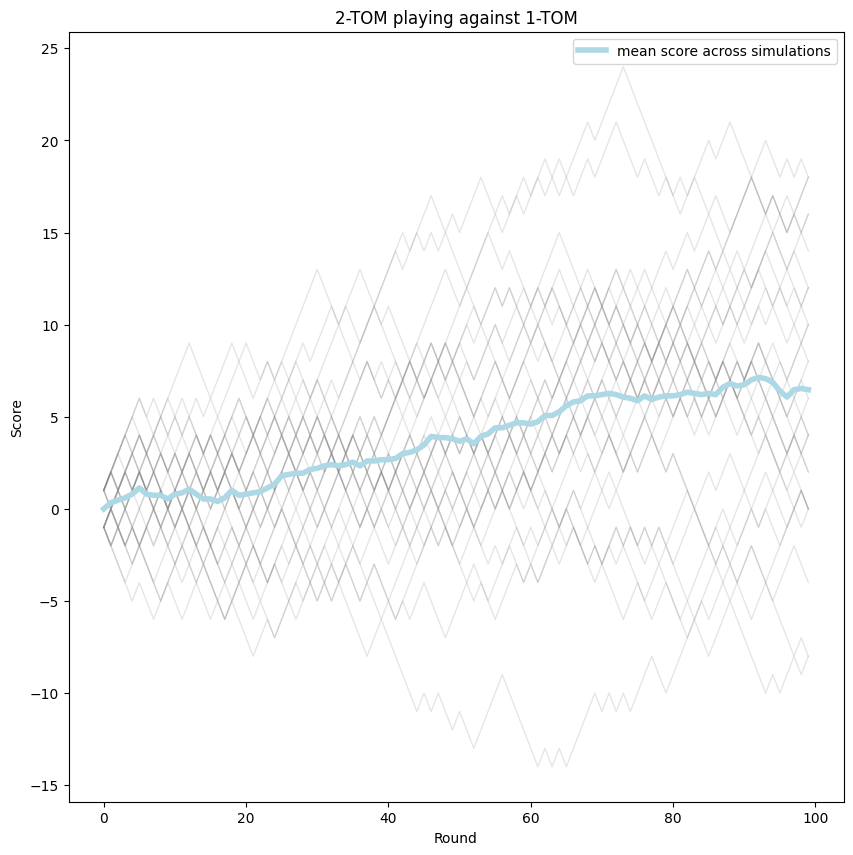

In [23]:
group.plot_score(agent0="1-TOM", agent1="2-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

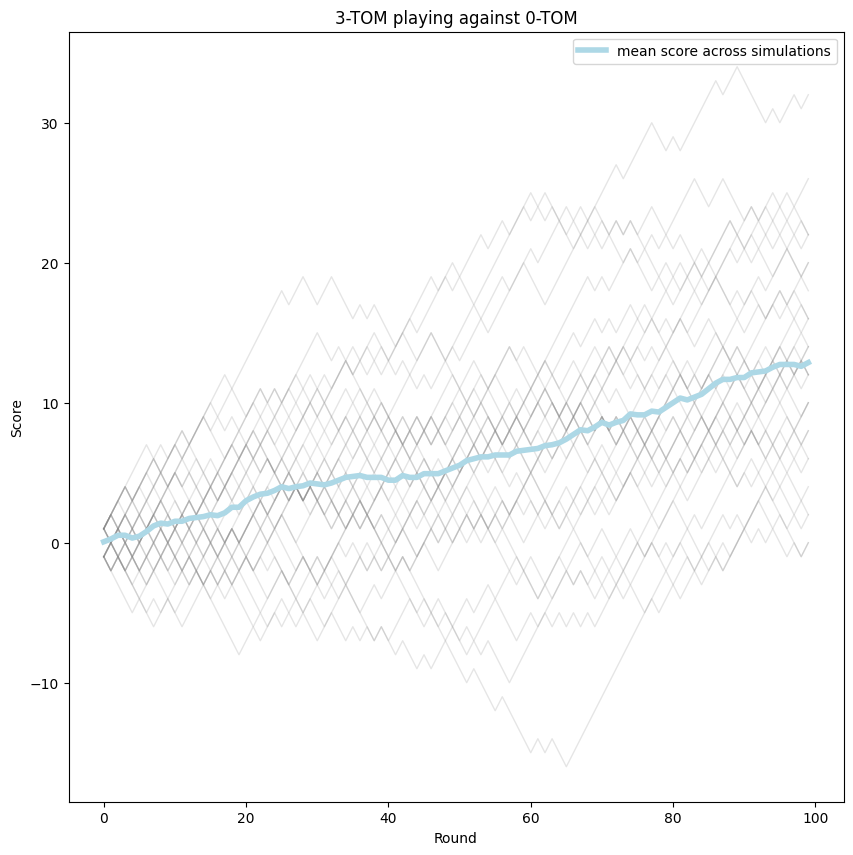

In [29]:
group.plot_score(agent0="0-TOM", agent1="3-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

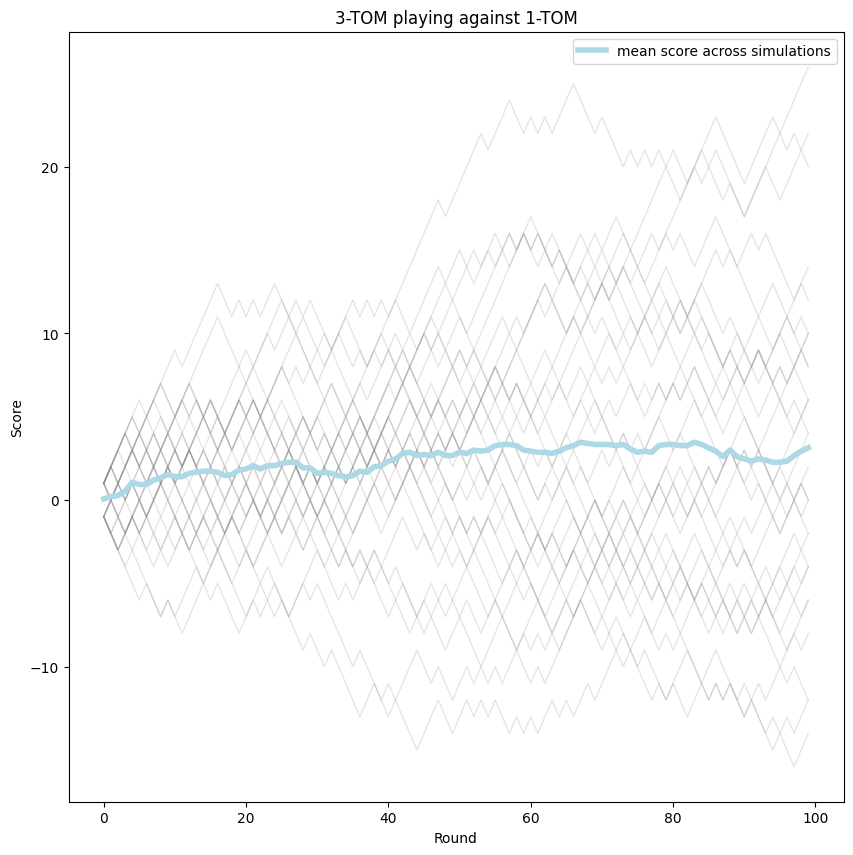

In [28]:
group.plot_score(agent0="1-TOM", agent1="3-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

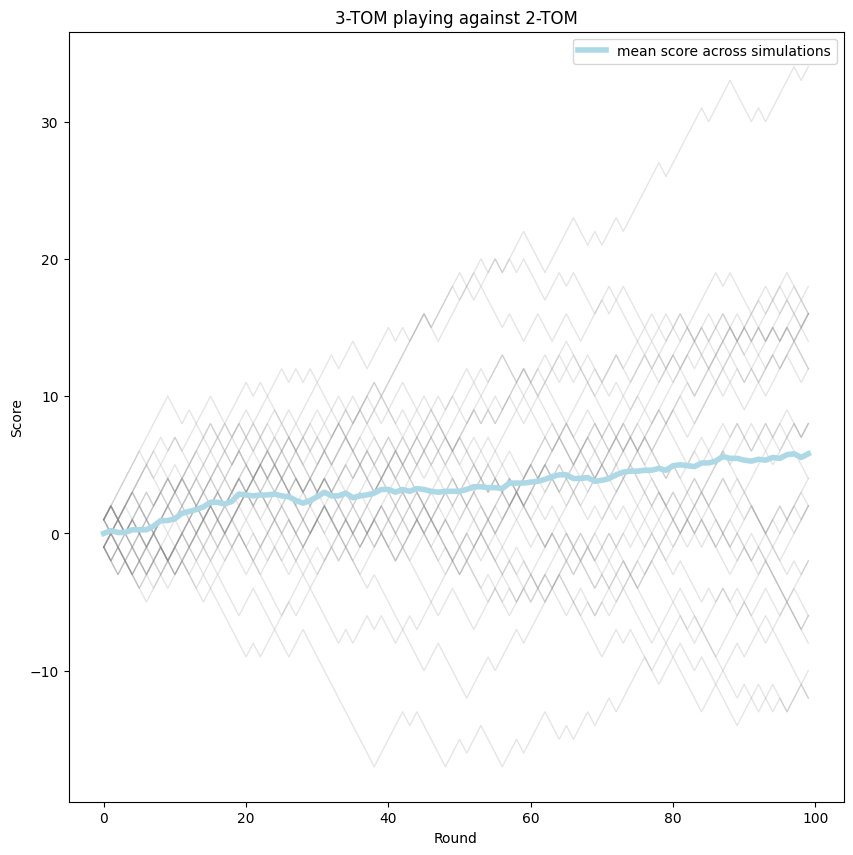

In [25]:
group.plot_score(agent0="2-TOM", agent1="3-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

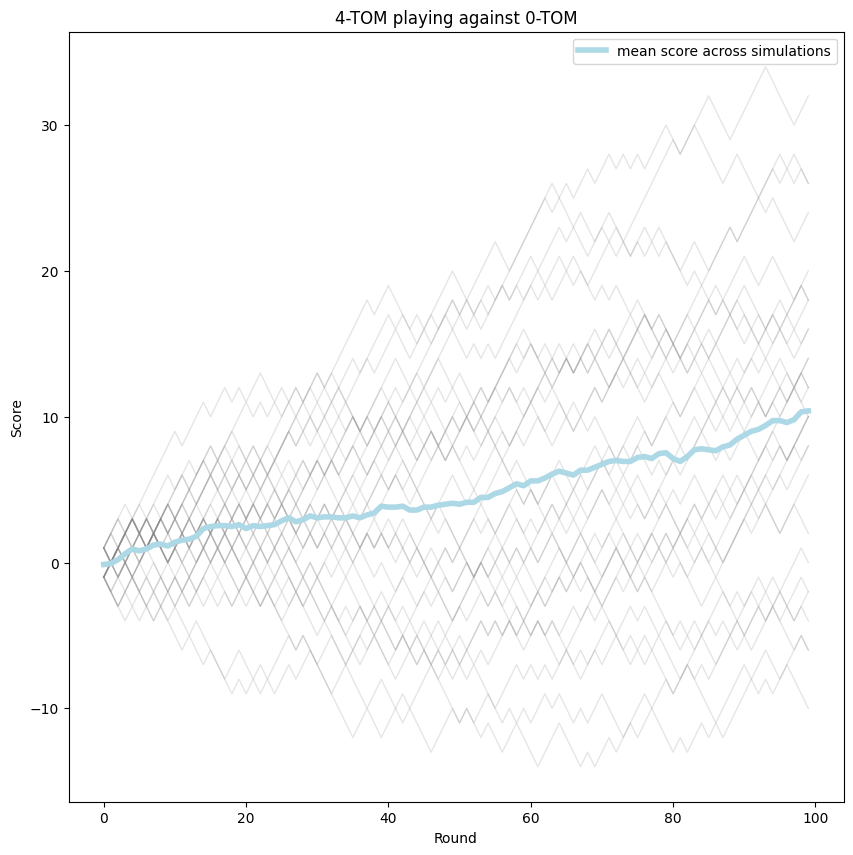

In [33]:
group.plot_score(agent0="0-TOM", agent1="4-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

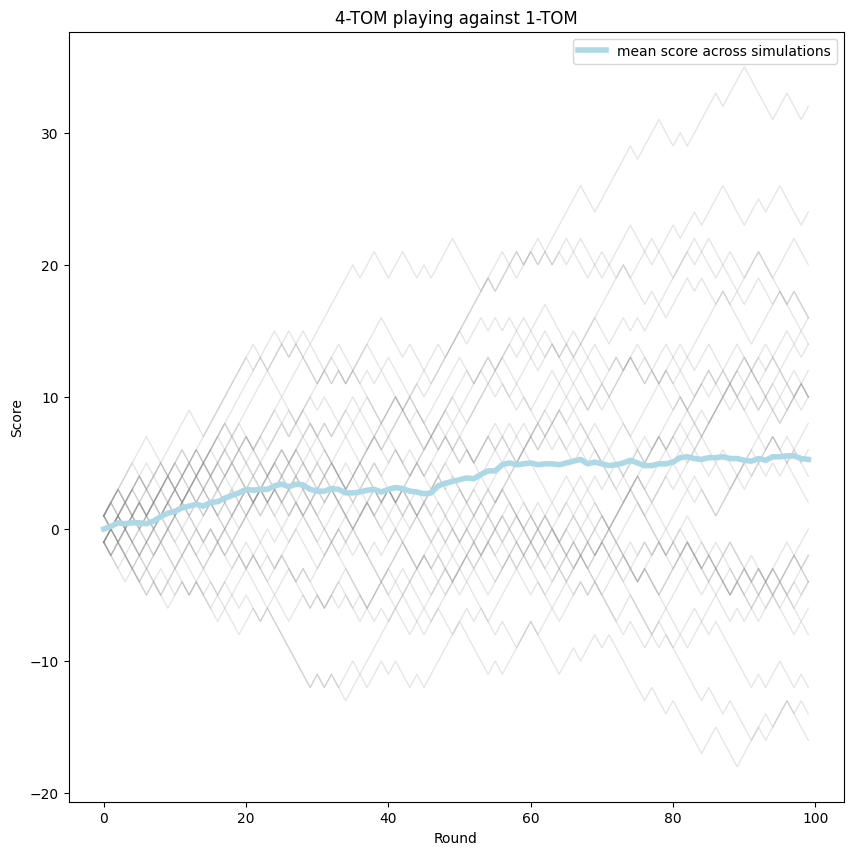

In [31]:
group.plot_score(agent0="1-TOM", agent1="4-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

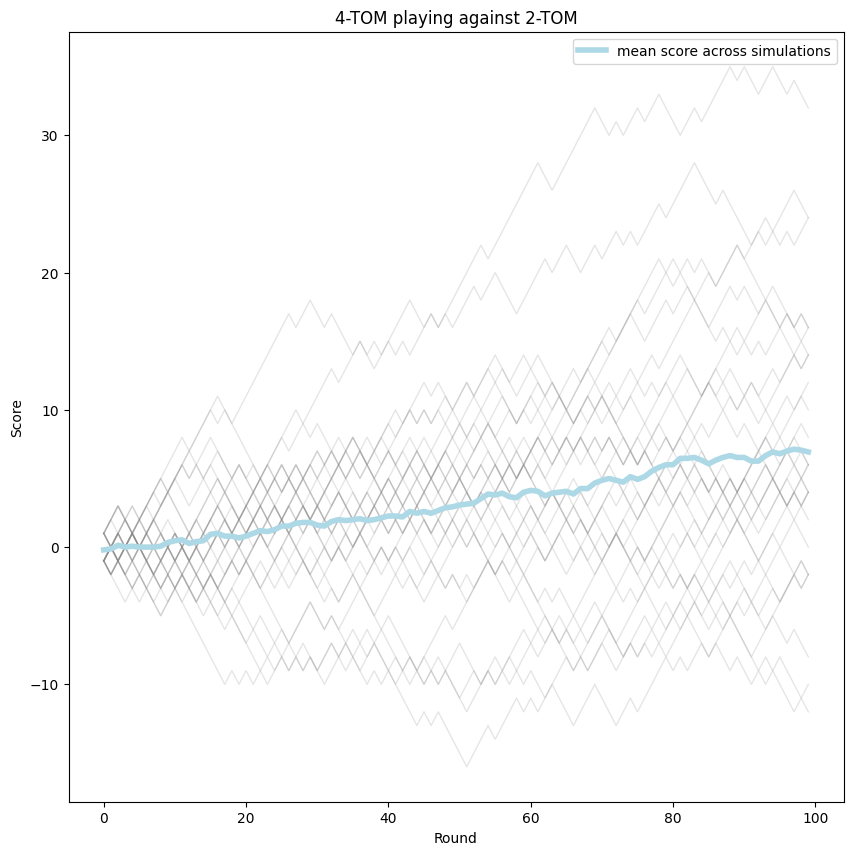

In [30]:
group.plot_score(agent0="2-TOM", agent1="4-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

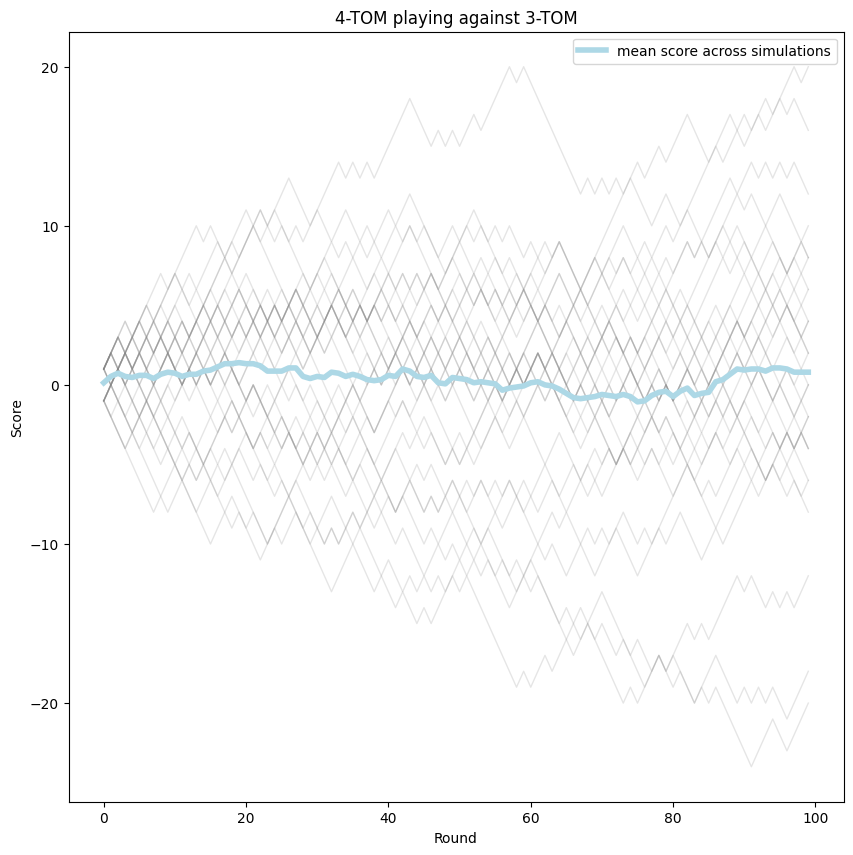

In [26]:
group.plot_score(agent0="3-TOM", agent1="4-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

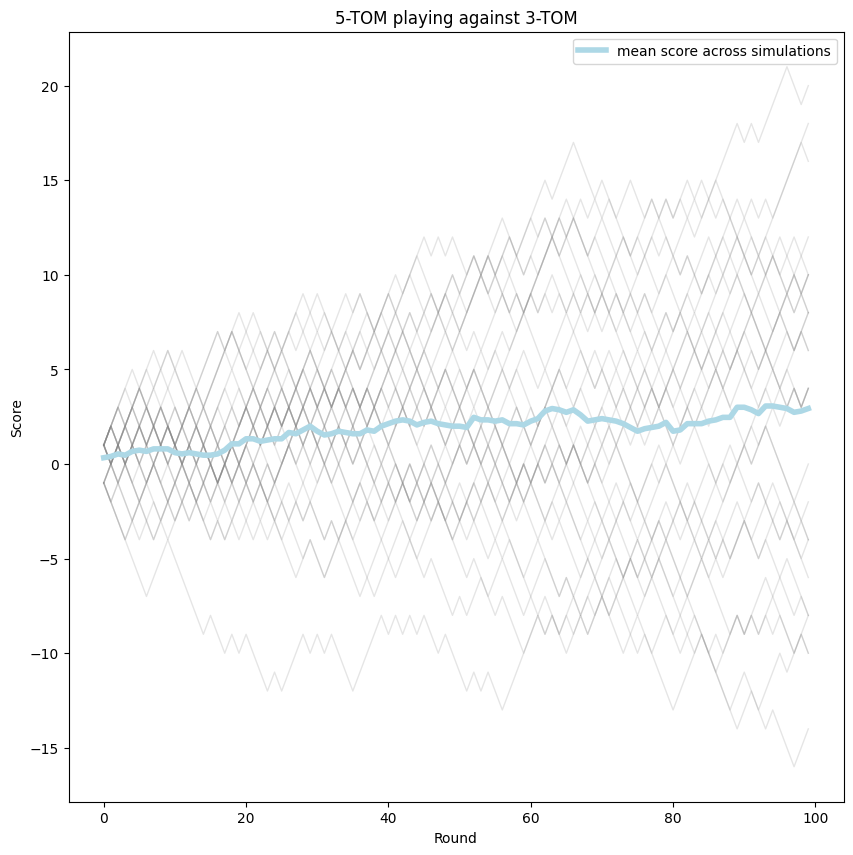

In [34]:
group.plot_score(agent0="3-TOM", agent1="5-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

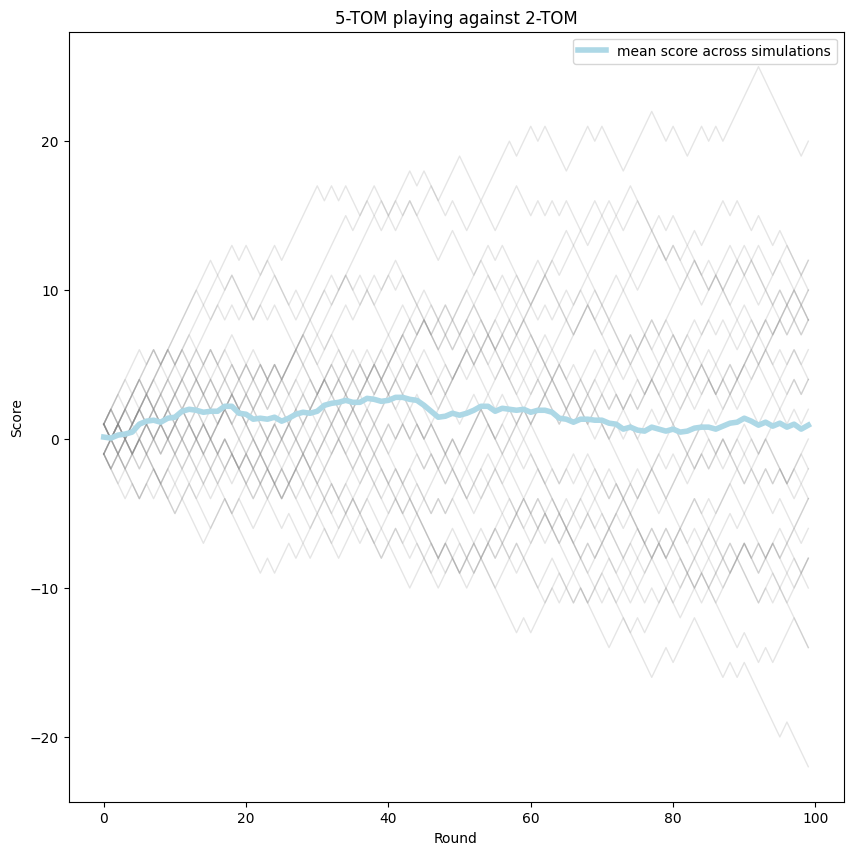

In [35]:
group.plot_score(agent0="2-TOM", agent1="5-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

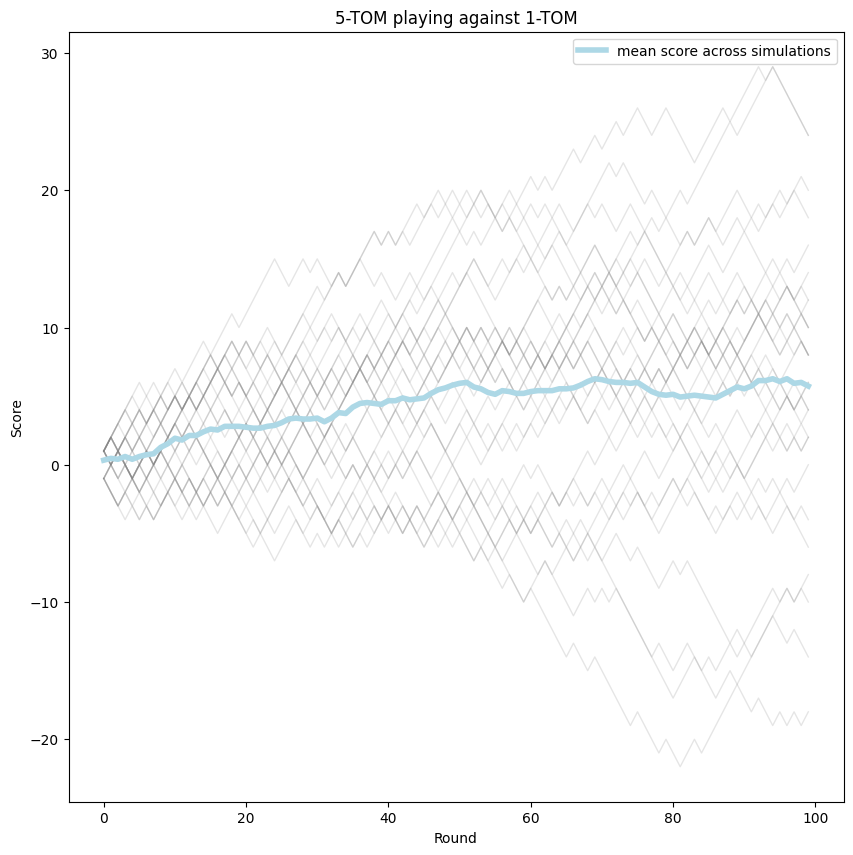

In [36]:
group.plot_score(agent0="1-TOM", agent1="5-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

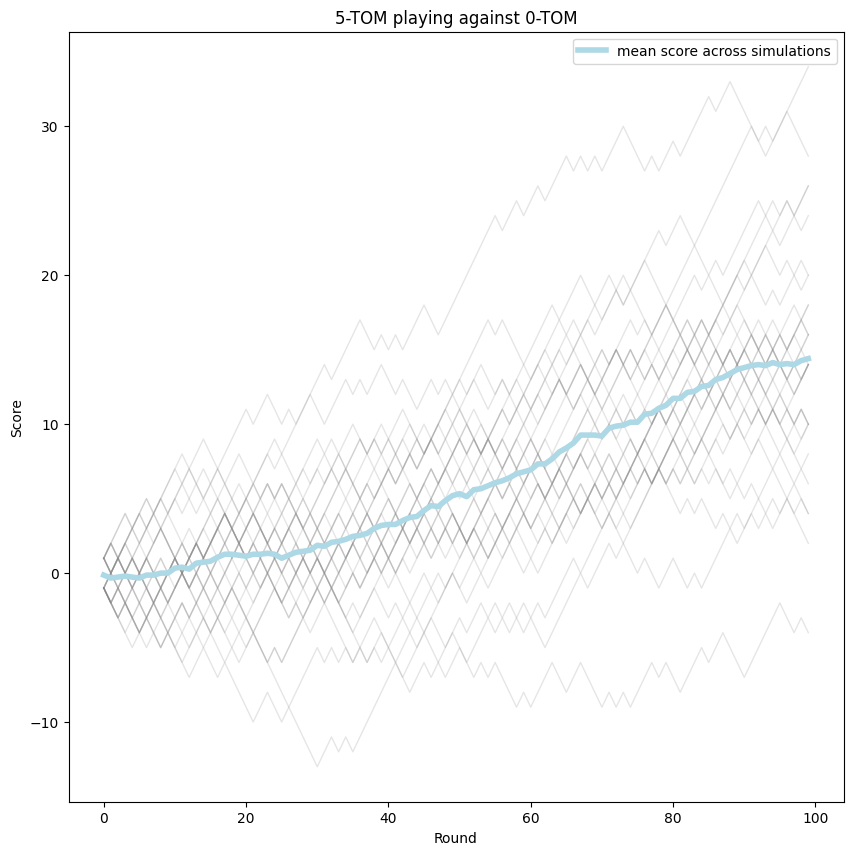

In [37]:
group.plot_score(agent0="0-TOM", agent1="5-TOM", agent=1)

<Figure size 1000x1000 with 0 Axes>

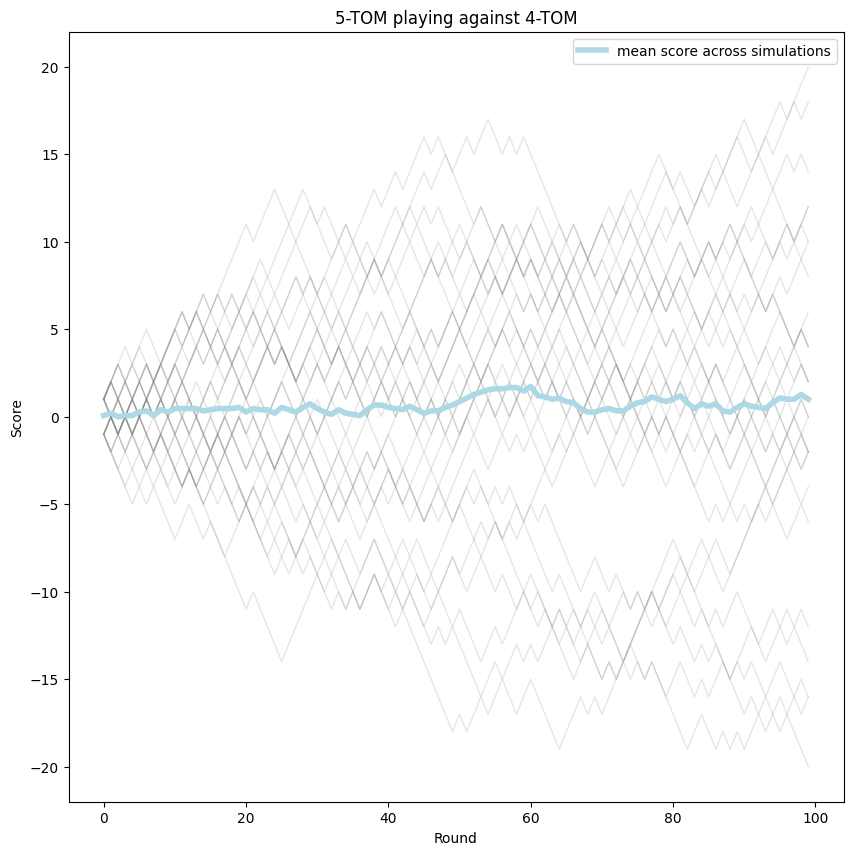

In [27]:
group.plot_score(agent0="4-TOM", agent1="5-TOM", agent=1)

###Confidence Intervals

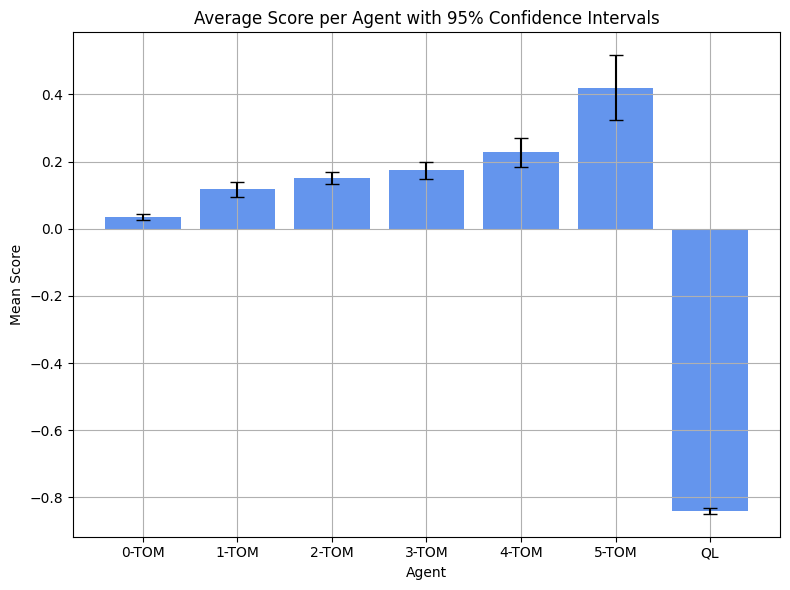

In [7]:
# First, compute average payoff per simulation per agent
# We'll process both agent_a and agent_b perspectives

# For agent_a (agent0)
df_agent0 = df_all.groupby(['n_sim', 'agent_a'])['payoff_agent0'].mean().reset_index()
df_agent0.columns = ['simulation', 'agent', 'score']

# For agent_b (agent1)
df_agent1 = df_all.groupby(['n_sim', 'agent_b'])['payoff_agent1'].mean().reset_index()
df_agent1.columns = ['simulation', 'agent', 'score']

# Combine both into one DataFrame
all_scores = pd.concat([df_agent0, df_agent1], ignore_index=True)

# Group by agent
grouped = all_scores.groupby('agent')['score']
means = grouped.mean()
stds = grouped.std()
n = grouped.count()
conf_intervals = 1.96 * stds / (n ** 0.5)  # 95% confidence interval

# Build DataFrame for plotting
ci_df = pd.DataFrame({
    'agent': means.index,
    'mean': means.values,
    'ci': conf_intervals.values
})

plt.figure(figsize=(8, 6))
plt.bar(ci_df['agent'], ci_df['mean'], yerr=ci_df['ci'], capsize=5, color='cornflowerblue')
plt.title('Average Score per Agent with 95% Confidence Intervals')
plt.xlabel('Agent')
plt.ylabel('Mean Score')
plt.grid(True)
plt.tight_layout()
plt.show()

###Runtime plot

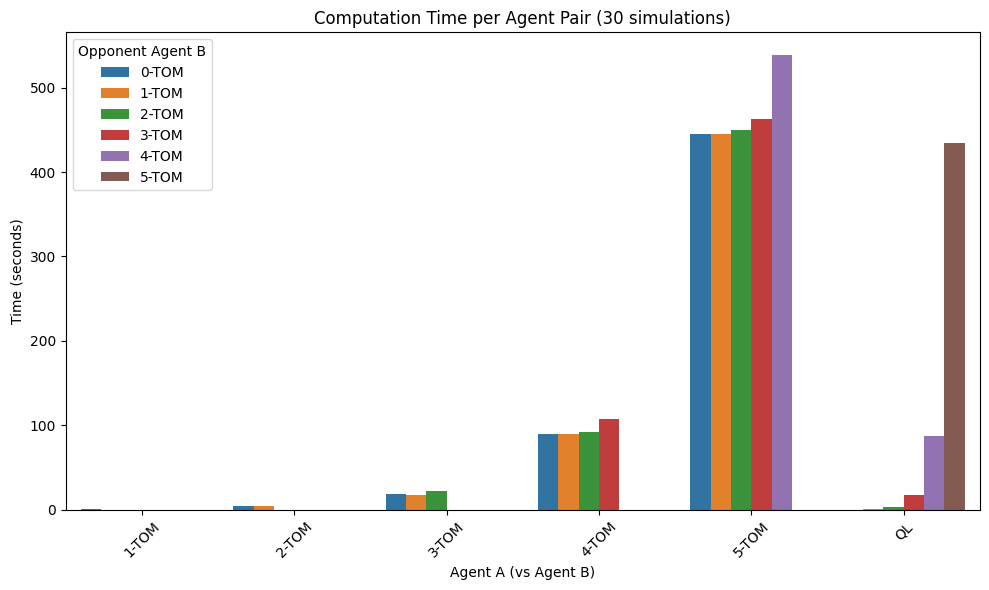

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=timing_df, x="agent_a", y="elapsed_sec", hue="agent_b")
plt.title("Computation Time per Agent Pair (30 simulations)")
plt.ylabel("Time (seconds)")
plt.xlabel("Agent A (vs Agent B)")
plt.xticks(rotation=45)
plt.legend(title="Opponent Agent B")
plt.tight_layout()
plt.show()

#Prisoners dilemma game

##Save results from the competition

In [9]:
#results_pd = group.compete(p_matrix=prisoners_dilemma, n_rounds=100, n_sim=30, verbose=True)

# Prepare to store timing results
timing_data = []
results_all = []

# Manually simulate each pair of agent objects
for i, name_a in enumerate(agent_names):
    for j, name_b in enumerate(agent_names):
        if i <= j:
            continue

        agent_a = group.get_agent(name_a)
        agent_b = group.get_agent(name_b)

        print(f"\n Simulating pair: ({name_a}, {name_b})")

        start_time = time.time()

        # Run 30 simulations of 100 rounds
        df = ts.compete(agent_a, agent_b, p_matrix=prisoners_dilemma, n_rounds=100, n_sim=30)

        elapsed = time.time() - start_time

        # Save timing
        timing_data.append({
            "agent_a": name_a,
            "agent_b": name_b,
            "elapsed_sec": elapsed
        })

        df['agent_a'] = name_a
        df['agent_b'] = name_b

        results_all.append(df)

# Convert to DataFrame for analysis
timing_df = pd.DataFrame(timing_data)

df_all = pd.concat(results_all, ignore_index=True)

# Save to CSV if needed
timing_df.to_csv("timing_results_pd.csv", index=False)



 Simulating pair: (1-TOM, 0-TOM)

 Simulating pair: (2-TOM, 0-TOM)

 Simulating pair: (2-TOM, 1-TOM)

 Simulating pair: (3-TOM, 0-TOM)

 Simulating pair: (3-TOM, 1-TOM)

 Simulating pair: (3-TOM, 2-TOM)

 Simulating pair: (4-TOM, 0-TOM)

 Simulating pair: (4-TOM, 1-TOM)

 Simulating pair: (4-TOM, 2-TOM)

 Simulating pair: (4-TOM, 3-TOM)

 Simulating pair: (5-TOM, 0-TOM)

 Simulating pair: (5-TOM, 1-TOM)


KeyboardInterrupt: 

##Plot the results

###Heatmap

In [ ]:
# Set figure size
plt.rcParams["figure.figsize"] = [18, 18]

group.plot_heatmap(cmap="RdBu")

###Bar Graphs for Average Score per Agent


In [ ]:
# First reshape to get all agent performances into one column
agent0_df = results_penny[['agent0', 'payoff_agent0']].rename(columns={'agent0': 'agent', 'payoff_agent0': 'payoff'})
agent1_df = results_penny[['agent1', 'payoff_agent1']].rename(columns={'agent1': 'agent', 'payoff_agent1': 'payoff'})
all_agents = pd.concat([agent0_df, agent1_df])

# Group and average
avg_scores = all_agents.groupby('agent')['payoff'].mean().reset_index()

# Plot
sns.barplot(data=avg_scores, x='agent', y='payoff', palette='viridis')
plt.title('Average Score per Agent')
plt.ylabel('Avg Score')
plt.xlabel('Agent')
plt.show()

###Learning Speed: Performance Over Time

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
group.plot_score(agent0="0-TOM", agent1="1-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="2-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="2-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="3-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="3-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="4-TOM", agent1="5-TOM", agent=1)

###Confidence intervals

In [ ]:
grouped = all_agents.groupby('agent')['payoff']
means = grouped.mean()
stds = grouped.std()
n = grouped.count()
conf_intervals = 1.96 * stds / (n**0.5)  # 95% CI

# Combine into a single DataFrame
ci_df = pd.DataFrame({
    'agent': means.index,
    'mean': means.values,
    'ci': conf_intervals.values
})

# Plot with error bars
plt.figure(figsize=(8,6))
plt.bar(ci_df['agent'], ci_df['mean'], yerr=ci_df['ci'], capsize=5, color='skyblue')
plt.title('Avg Score with 95% Confidence Intervals')
plt.ylabel('Mean Score')
plt.xlabel('Agent')
plt.grid(True)
plt.show()

###Runtime plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=timing_df, x="agent_a", y="elapsed_sec", hue="agent_b")
plt.title("Computation Time per Agent Pair (30 simulations)")
plt.ylabel("Time (seconds)")
plt.xlabel("Agent A (vs Agent B)")
plt.xticks(rotation=45)
plt.legend(title="Opponent Agent B")
plt.tight_layout()
plt.show()


#Staghunt game

##Save results from the competition

In [ ]:
#results_sh = group.compete(p_matrix=staghunt, n_rounds=100, n_sim=30, verbose=True)

# Storage for time results
timing_data = []

# Manually run all agent pairs
for i, agent_a in enumerate(group.agents):
    for j, agent_b in enumerate(group.agents):
        if i <= j:  # avoid duplicate reverse pairs
            continue

        print(f"\n🔁 Simulating pair: ({agent_a.name}, {agent_b.name})")

        # Start timing
        start_time = time.time()

        # Run simulation
        df = ts.compete(agent_a, agent_b, p_matrix=penny, n_rounds=100, n_sim=30)

        # End timing
        elapsed_time = time.time() - start_time

        # Save timing result
        timing_data.append({
            "agent_a": agent_a.name,
            "agent_b": agent_b.name,
            "elapsed_sec": elapsed_time
        })

# Convert to DataFrame for analysis
timing_df = pd.DataFrame(timing_data)

# Save to CSV if needed
timing_df.to_csv("timing_results_sh.csv", index=False)

##Plot the results

###Heatmap

In [ ]:
# Set figure size
plt.rcParams["figure.figsize"] = [18, 18]

group.plot_heatmap(cmap="RdBu")

###Bar Graphs for Average Score per Agent


In [ ]:
# First reshape to get all agent performances into one column
agent0_df = results_penny[['agent0', 'payoff_agent0']].rename(columns={'agent0': 'agent', 'payoff_agent0': 'payoff'})
agent1_df = results_penny[['agent1', 'payoff_agent1']].rename(columns={'agent1': 'agent', 'payoff_agent1': 'payoff'})
all_agents = pd.concat([agent0_df, agent1_df])

# Group and average
avg_scores = all_agents.groupby('agent')['payoff'].mean().reset_index()

# Plot
sns.barplot(data=avg_scores, x='agent', y='payoff', palette='viridis')
plt.title('Average Score per Agent')
plt.ylabel('Avg Score')
plt.xlabel('Agent')
plt.show()

###Learning Speed: Performance Over Time

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
group.plot_score(agent0="0-TOM", agent1="1-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="2-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="2-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="3-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="3-TOM", agent1="4-TOM", agent=1)

In [ ]:
group.plot_score(agent0="0-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="1-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="2-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="3-TOM", agent1="5-TOM", agent=1)

In [ ]:
group.plot_score(agent0="4-TOM", agent1="5-TOM", agent=1)

###Confidence intervals

In [ ]:
grouped = all_agents.groupby('agent')['payoff']
means = grouped.mean()
stds = grouped.std()
n = grouped.count()
conf_intervals = 1.96 * stds / (n**0.5)  # 95% CI

# Combine into a single DataFrame
ci_df = pd.DataFrame({
    'agent': means.index,
    'mean': means.values,
    'ci': conf_intervals.values
})

# Plot with error bars
plt.figure(figsize=(8,6))
plt.bar(ci_df['agent'], ci_df['mean'], yerr=ci_df['ci'], capsize=5, color='skyblue')
plt.title('Avg Score with 95% Confidence Intervals')
plt.ylabel('Mean Score')
plt.xlabel('Agent')
plt.grid(True)
plt.show()

###Runtime plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=timing_df, x="agent_a", y="elapsed_sec", hue="agent_b")
plt.title("Computation Time per Agent Pair (30 simulations)")
plt.ylabel("Time (seconds)")
plt.xlabel("Agent A (vs Agent B)")
plt.xticks(rotation=45)
plt.legend(title="Opponent Agent B")
plt.tight_layout()
plt.show()